In [1]:
import glob
import chess_SL_E8_lib as lib
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import chess
# import numpy as np

In [2]:
MODEL_NUM = 8
MODEL_VERSION = 1

path = "../Data/DataTrain"

letters_in = 'a'
letters_out = 'b'

csv_files1 = []
csv_files2 = []

for let in letters_in:
    csv_files1.extend(glob.glob(f'{path}/Chess_Jan_{let}*'))

for let_ in letters_out:
    csv_files2.extend(glob.glob(f'{path}/Chess_Jan_{let_}*'))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Models Trained
- V1 -> Predictor: tensor [64,64]
- V2 -> Predictor: tensor [64,64]
- V3 -> Predictor: tensor [64,64]
- V4 -> Predictor: tensor [64,64]

- E1 -> Epochs: 200, SGD(Learning Rate: 0.030, Momentum = 0.9), Loss: L1Loss, Training: "a*", Validation: "a*" |||| Vars: FEN, white_active, is_check |||| Predictor: CP
- E2 -> Epochs: 200, SGD(Learning Rate: 0.035, Momentum = 0.9), Loss: L1Loss, Training: "a*", Validation: "b*" |||| Vars: FEN, white_active, is_check |||| Predictor: CP
- E3 -> Epochs: 75, Adam(Learning Rate: 0.006, Mometum = 0.9), Loss: L1Loss, Training: "a|b*", Validation: "c|d*" |||| Vars: FEN, white_active, is_check, is_capture |||| Predictor: CP
- E3.1 -> Epochs: 50, Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c*", Validation: "d|e|f*" |||| Vars: FEN, white_active, is_check, is_capture |||| Predictor: CP
- E3.2 -> Epochs: 40, Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c|d*", Validation: "d|e|f|g*" |||| Vars: FEN, white_active, is_check, is_capture |||| Predictor: CP
- E4.1 -> Epochs: 25, Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c|d*", Validation: "d|e|f|g*" |||| Vars: FEN, white_active, is_capture |||| Predictor: CP
- E5.1 -> Epochs: 25, NN(1 conv, 2 FC), Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c|d*", Validation: "d|e*" |||| Vars: FEN |||| Predictor: CP
- E5.2 -> Epochs: 50, NN(1 conv, 2 FC), Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c|d|e*", Validation: "e|f*" |||| Vars: FEN |||| Predictor: CP
- E6.1 -> Epochs: 25, NN(2 conv, 2 FC), Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c|d*", Validation: "d|e*" |||| Vars: FEN |||| Predictor: CP
- E6.2 -> Epochs: 50, NN(2 conv, 2 FC), Adam(Learning Rate: 0.006), Loss: L1Loss, Training: "a|b|c|d|e*", Validation: "e|f*" |||| Vars: FEN |||| Predictor: CP
- E7.1 (loaded from 6.2) -> Epochs: 30, NN(2 conv, 2 FC), Adam(Learning Rate: 0.0061), Loss: L1Loss, Training: "abcdefghijklmnopqr", Validation: "adhlp" |||| Vars: FEN |||| Predictor: CP
- E7.2 (loaded from 7.1) -> Epochs: 30, NN(2 conv, 2 FC), Adam(Learning Rate: 0.0061), Loss: L1Loss, Training: "abcdefghijklmnopqrstuv", Validation: "adhlptw" |||| Vars: FEN |||| Predictor: CP

In [3]:
# Create a dataset
dataset1 = lib.ChessIterableDataset(csv_files1)
dataset2 = lib.ChessIterableDataset(csv_files2)

# Create a data loader
train_data_loader = DataLoader(dataset1, batch_size = 15000)
val_data_loader = DataLoader(dataset2, batch_size = 15000)

# Create a model
model = lib.EvalNet()
# model = torch.load(f'./models_EL/model_E7-1.pth')
model = model.to(device)

criterion = nn.L1Loss() # nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.035, momentum=0.9)

# optimizer = optim.Adam(model.parameters(), lr=0.0065)
optimizer = optim.Adam(model.parameters(), lr=0.01) # changed for 8.3

# Train the model
train_loss_hist, valid_loss_hist = lib.train(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs = 30)

Begin Training! (on cuda)


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/30, Training Loss: 2.27288, Validation Loss: 1.83541


  3%|▎         | 1/30 [1:08:46<33:14:27, 4126.46s/it]

Epoch 2/30, Training Loss: 1.72504, Validation Loss: 1.74116


  7%|▋         | 2/30 [2:17:46<32:09:16, 4134.18s/it]

Epoch 3/30, Training Loss: 1.61581, Validation Loss: 1.60257


 10%|█         | 3/30 [3:26:39<31:00:09, 4133.67s/it]

Epoch 4/30, Training Loss: 1.55655, Validation Loss: 1.57295


 13%|█▎        | 4/30 [4:34:59<29:45:30, 4120.42s/it]

Epoch 5/30, Training Loss: 1.52528, Validation Loss: 1.52111


 17%|█▋        | 5/30 [5:43:27<28:35:01, 4116.07s/it]

Epoch 6/30, Training Loss: 1.50028, Validation Loss: 1.52482


 20%|██        | 6/30 [6:52:11<27:27:26, 4118.62s/it]

Epoch 7/30, Training Loss: 1.49513, Validation Loss: 1.49897


 23%|██▎       | 7/30 [8:01:21<26:22:46, 4128.97s/it]

Epoch 8/30, Training Loss: 1.47289, Validation Loss: 1.48442


 27%|██▋       | 8/30 [9:09:54<25:12:02, 4123.76s/it]

Epoch 9/30, Training Loss: 1.46390, Validation Loss: 1.48030


 30%|███       | 9/30 [10:19:02<24:06:00, 4131.44s/it]

Epoch 10/30, Training Loss: 1.46175, Validation Loss: 1.47036


 33%|███▎      | 10/30 [11:27:43<22:56:04, 4128.20s/it]

Epoch 11/30, Training Loss: 1.43921, Validation Loss: 1.48284


 37%|███▋      | 11/30 [12:36:11<21:45:19, 4122.06s/it]

Epoch 12/30, Training Loss: 1.43835, Validation Loss: 1.47311


 40%|████      | 12/30 [13:44:32<20:34:40, 4115.58s/it]

Epoch 13/30, Training Loss: 1.42550, Validation Loss: 1.46174


 43%|████▎     | 13/30 [14:53:11<19:26:23, 4116.67s/it]

Epoch 14/30, Training Loss: 1.41554, Validation Loss: 1.45158


 47%|████▋     | 14/30 [16:02:01<18:18:52, 4120.80s/it]

Epoch 15/30, Training Loss: 1.40927, Validation Loss: 1.45466


 50%|█████     | 15/30 [17:10:45<17:10:25, 4121.73s/it]

Epoch 16/30, Training Loss: 1.40738, Validation Loss: 1.43478


 53%|█████▎    | 16/30 [18:22:49<16:15:55, 4182.55s/it]

Epoch 17/30, Training Loss: 1.40180, Validation Loss: 1.45906


 57%|█████▋    | 17/30 [19:34:56<15:15:36, 4225.92s/it]

Epoch 18/30, Training Loss: 1.39420, Validation Loss: 1.42788


 60%|██████    | 18/30 [20:47:41<14:13:34, 4267.91s/it]

Epoch 19/30, Training Loss: 1.39589, Validation Loss: 1.44775


 63%|██████▎   | 19/30 [22:00:33<13:08:10, 4299.18s/it]

Epoch 20/30, Training Loss: 1.39576, Validation Loss: 1.43536


 63%|██████▎   | 19/30 [23:06:00<13:22:25, 4376.88s/it]

Manual Stop: Finished Training Early!
Finished Training!


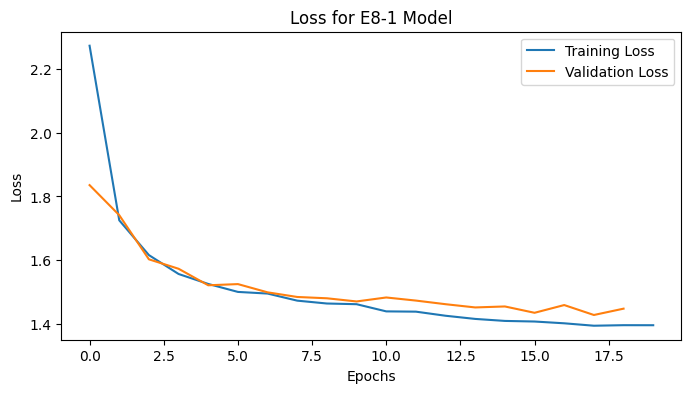

In [4]:
torch.save(model, f'model_E{MODEL_NUM}-{MODEL_VERSION}.pth')

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(train_loss_hist, label = 'Training Loss')
plt.plot(valid_loss_hist, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.ylim(0, None)
plt.title(f'Loss for E{MODEL_NUM}-{MODEL_VERSION} Model')
plt.legend()
plt.savefig(f'Loss_E{MODEL_NUM}-{MODEL_VERSION}.png')
plt.show()

In [5]:
import pickle

pickle.dump(train_loss_hist, open(f'pickle/training_loss_history_E{MODEL_NUM}-{MODEL_VERSION}.pkl', 'wb'))
pickle.dump(valid_loss_hist, open(f'pickle/validation_loss_history_E{MODEL_NUM}-{MODEL_VERSION}.pkl', 'wb'))

In [ ]:
model_loaded = torch.load(f'model_E{MODEL_NUM}-{MODEL_VERSION}.pth')

In [ ]:
board = chess.Board()

In [ ]:
move = lib.predict(model_loaded, board.fen())
print(move)
board

In [ ]:
board.push_uci(move)
board

In [ ]:
move = lib.predict(model_loaded, board.fen())

In [ ]:
move = 'e4f6'